In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import PowerTransformer
PT=PowerTransformer()
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split ,cross_val_score

# Dataset is now stored in a Pandas Dataframe

In [2]:
df=pd.read_csv('C:/Users/naman/Downloads/naman python/ana lytics/loan prediction/bigmart sales/train_v9rqX0R (1).csv')
df.head()   


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.skew()

Item_Weight                  0.082426
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64

In [5]:
df.set_index('Item_Identifier',inplace=True)

# Outlier Analysis

(array([1, 2, 3, 4, 5]),
 [Text(1, 0, 'Item_Weight'),
  Text(2, 0, 'Item_Visibility'),
  Text(3, 0, 'Item_MRP'),
  Text(4, 0, 'Outlet_Establishment_Year'),
  Text(5, 0, 'Item_Outlet_Sales')])

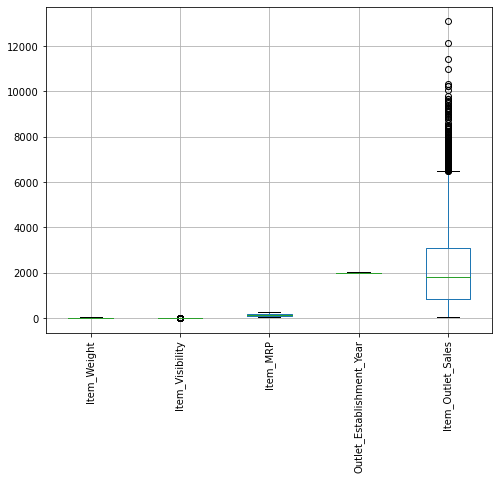

In [7]:
plt.figure(figsize=[8,6])
df.boxplot()
plt.xticks(rotation=90)

In [34]:
#Item_Outlet_Sales have high Outliers 

In [8]:
df.isnull().sum()/len(df)*100

Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [19]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

# Univariate -Analysis

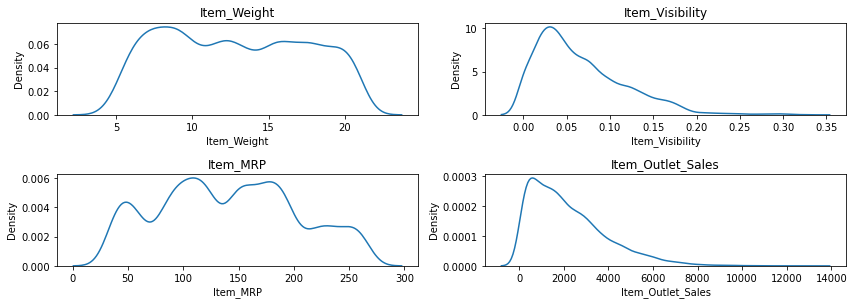

In [11]:
col=['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']
a=3
b=2
c=1
plt.figure(figsize=[12,6])
for i in col:
    
    plt.subplot(a,b,c)
    plt.title(i)
    sns.kdeplot(x=df[i])
    c+=1
plt.tight_layout()    
plt.show()  

In [12]:
# we can infer that Outlet Sales are Heavily  Right Skewed.

# Bivariate Analysis of Features With Target Variable 

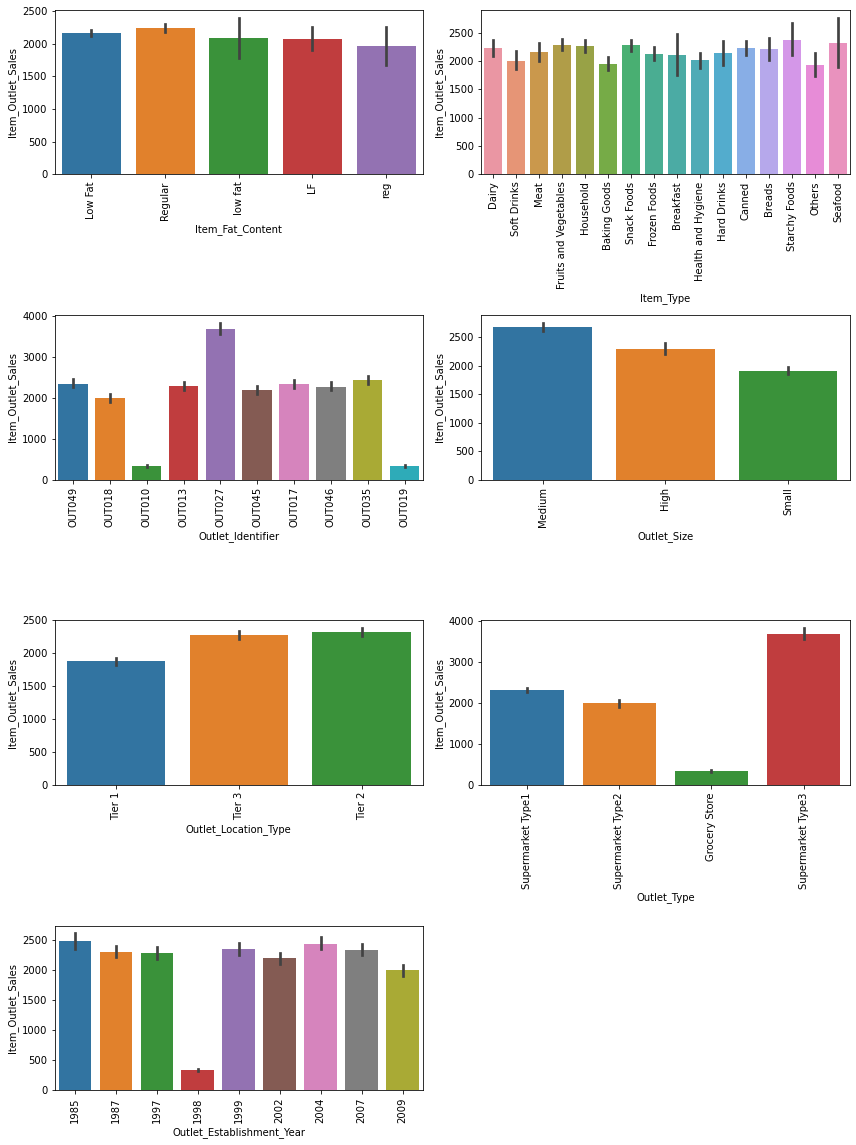

In [24]:
colu=['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type','Outlet_Establishment_Year']
a=4
b=2
c=1
plt.figure(figsize=[12,16])
for i in colu:
    plt.subplot(a,b,c)
    sns.barplot(x=df[i],y=df['Item_Outlet_Sales'])
    plt.xticks(rotation=90)
    c=c+1

plt.tight_layout()   
plt.show()

In [ ]:
#Inferences---

## Mean Sales of Regular  fat item is highest in number .
## Starchy Foods have highest  Mean Sales of 2300 Dollars folllowed by Seafood.
## Highest Mean  Sales is of Store Out 0027 and min is of Out019 and Out010.
## Highest Mean  Sales is of Store which is having Medium Type Sales Outlet .
## Highest Mean  Sales is of Store where outlet location is  Tier 2 and Tier 3.
## Highest Mean  Sales is of Store where Outlet type is Supermarket type 3 and Type1.
## Highest Sales were recorded in Year 1985 and year 2004.


In [25]:
df.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales'],
      dtype='object')

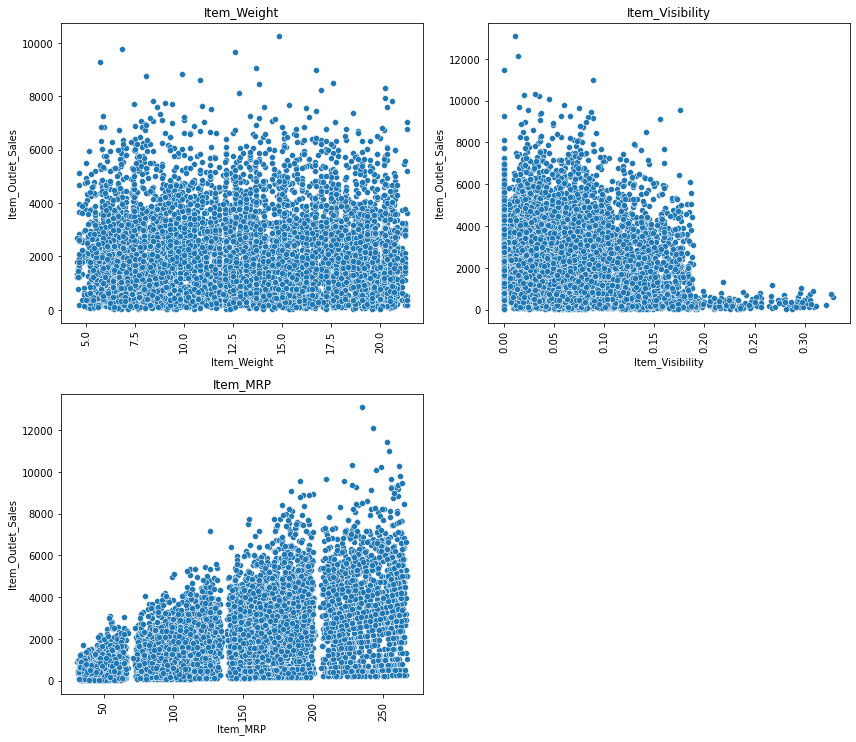

In [32]:
cols = [ 'Item_Weight', 'Item_Visibility','Item_MRP']
a = 3
b = 2 
counter = 1 
plt.figure(figsize = [12, 15])
for i in cols:
    plt.subplot(a,b,counter)
    plt.title(i)
    sns.scatterplot(x=df[i],y=df['Item_Outlet_Sales'],data=df)
    plt.xticks(rotation=90) 
    counter = counter+1 
plt.tight_layout()
plt.show()

In [ ]:
# inference --
## Item Sales are nearly equal for all Item weight 
## Item with Higher visibility have low sales 
## Item having MRP of 250 have highest Sales .

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8523 entries, FDA15 to DRG01
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                6113 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 1.0+ MB


<AxesSubplot:>

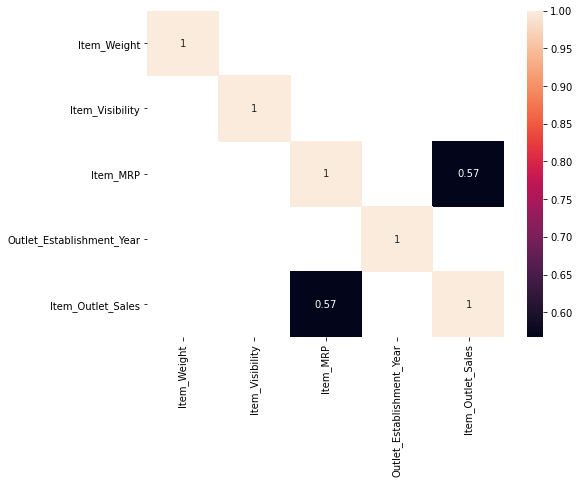

In [33]:
plt.figure(figsize=[8,6])
sns.heatmap(df.corr()[df.corr()>0.5],annot=True)

In [ ]:
#Inferences --
## we can see that Item Mrp Has High Correlation with Item_Outlet_Sales .

In [106]:
df.select_dtypes(include=np.number)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Identifier,,,,,
FDA15,9.300,0.016047,249.8092,1999,3735.1380
DRC01,5.920,0.019278,48.2692,2009,443.4228
FDN15,17.500,0.016760,141.6180,1999,2097.2700
FDX07,19.200,0.000000,182.0950,1998,732.3800
NCD19,8.930,0.000000,53.8614,1987,994.7052
...,...,...,...,...,...
FDF22,6.865,0.056783,214.5218,1987,2778.3834
FDS36,8.380,0.046982,108.1570,2002,549.2850
NCJ29,10.600,0.035186,85.1224,2004,1193.1136


In [107]:
df.select_dtypes(exclude=np.number)

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
Item_Identifier,,,,,,
FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...
FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
FDS36,Regular,Baking Goods,OUT045,NaN,Tier 2,Supermarket Type1
NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1


In [108]:
df.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [109]:
df.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [110]:
df.Outlet_Identifier.value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [111]:
df.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [112]:
df.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [113]:
df.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [114]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [115]:
df.Item_Fat_Content=le.fit_transform(df.Item_Fat_Content)
df.Item_Type=le.fit_transform(df.Item_Type)
df.Outlet_Identifier=le.fit_transform(df.Outlet_Identifier)
df.Outlet_Size=le.fit_transform(df.Outlet_Size)
df.Outlet_Location_Type=le.fit_transform(df.Outlet_Location_Type)
df.Outlet_Type=le.fit_transform(df.Outlet_Type)

In [116]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,,,,,,,,,,,
FDA15,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
DRC01,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
FDN15,17.50,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
FDX07,19.20,2,0.000000,6,182.0950,0,1998,3,2,0,732.3800
NCD19,8.93,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [117]:
df.dtypes

Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                      int32
Item_MRP                     float64
Outlet_Identifier              int32
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                    int32
Item_Outlet_Sales            float64
dtype: object

In [118]:
df.Outlet_Establishment_Year=df.Outlet_Establishment_Year.astype('object')

df=df.drop('Outlet_Establishment_Year',axis=1)

In [119]:
df=pd.get_dummies(df)

In [120]:
df.dtypes

Item_Weight                       float64
Item_Fat_Content                    int32
Item_Visibility                   float64
Item_Type                           int32
Item_MRP                          float64
Outlet_Identifier                   int32
Outlet_Size                         int32
Outlet_Location_Type                int32
Outlet_Type                         int32
Item_Outlet_Sales                 float64
Outlet_Establishment_Year_1985      uint8
Outlet_Establishment_Year_1987      uint8
Outlet_Establishment_Year_1997      uint8
Outlet_Establishment_Year_1998      uint8
Outlet_Establishment_Year_1999      uint8
Outlet_Establishment_Year_2002      uint8
Outlet_Establishment_Year_2004      uint8
Outlet_Establishment_Year_2007      uint8
Outlet_Establishment_Year_2009      uint8
dtype: object

In [121]:
df.shape

(8523, 19)

In [122]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Establishment_Year_1985,Outlet_Establishment_Year_1987,Outlet_Establishment_Year_1997,Outlet_Establishment_Year_1998,Outlet_Establishment_Year_1999,Outlet_Establishment_Year_2002,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009
Item_Identifier,,,,,,,,,,,,,,,,,,,
FDA15,9.30,1,0.016047,4,249.8092,9,1,0,1,3735.1380,0,0,0,0,1,0,0,0,0
DRC01,5.92,2,0.019278,14,48.2692,3,1,2,2,443.4228,0,0,0,0,0,0,0,0,1
FDN15,17.50,1,0.016760,10,141.6180,9,1,0,1,2097.2700,0,0,0,0,1,0,0,0,0
FDX07,19.20,2,0.000000,6,182.0950,0,3,2,0,732.3800,0,0,0,1,0,0,0,0,0
NCD19,8.93,1,0.000000,9,53.8614,1,0,2,1,994.7052,0,1,0,0,0,0,0,0,0


In [123]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

# Using Linear regression

In [124]:
X=df.drop('Item_Outlet_Sales',axis=1)
y=df['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [125]:
X_train.isnull().sum()

Item_Weight                       1187
Item_Fat_Content                     0
Item_Visibility                      0
Item_Type                            0
Item_MRP                             0
Outlet_Identifier                    0
Outlet_Size                          0
Outlet_Location_Type                 0
Outlet_Type                          0
Outlet_Establishment_Year_1985       0
Outlet_Establishment_Year_1987       0
Outlet_Establishment_Year_1997       0
Outlet_Establishment_Year_1998       0
Outlet_Establishment_Year_1999       0
Outlet_Establishment_Year_2002       0
Outlet_Establishment_Year_2004       0
Outlet_Establishment_Year_2007       0
Outlet_Establishment_Year_2009       0
dtype: int64

In [126]:
from sklearn.linear_model import LinearRegression 
lr=LinearRegression()


from sklearn.impute import KNNImputer
knn=KNNImputer()
X_train_impute=pd.DataFrame(knn.fit_transform(X_train),columns=X_train.columns)
X_test_impute=pd.DataFrame(knn.transform(X_test),columns=X_test.columns)


X_train_scaled=pd.DataFrame(sc.fit_transform(X_train_impute),columns=X_train_impute.columns)
X_test_scaled=pd.DataFrame(sc.transform(X_test_impute),columns=X_test_impute.columns)



lr=LinearRegression()
lr_model=lr.fit(X_train_scaled,y_train)
y_pred_linear=lr_model.predict(X_test_scaled)

print('mse   ',mean_squared_error(y_test,y_pred_linear))
print('Rmse - ',np.sqrt(mean_squared_error(y_test,y_pred_linear)))

print('r 2 square- ',r2_score(y_test,y_pred_linear))
print()

print('train score ',lr_model.score(X_train_scaled,y_train))
print('test score ',lr_model.score(X_test_scaled,y_test))

mse    1254234.4725453376
Rmse -  1119.9261013769335
r 2 square-  0.5774728852794029

train score  0.5595169802367508
test score  0.5774728852794029


# Using Power transformer 

In [127]:
from sklearn.impute import KNNImputer
knn=KNNImputer()
X_train_impute=pd.DataFrame(knn.fit_transform(X_train),columns=X_train.columns)
X_test_impute=pd.DataFrame(knn.transform(X_test),columns=X_test.columns)

X_train_power=pd.DataFrame(PT.fit_transform(X_train_impute),columns=X_train_impute.columns)
X_test_power=pd.DataFrame(PT.transform(X_test_impute),columns=X_test_impute.columns)


lr=LinearRegression()
lr_model=lr.fit(X_train_power,y_train)
y_pred_linear=lr_model.predict(X_test_power)


print('mse -PT  ',mean_squared_error(y_test,y_pred_linear))
print('Rmse -PT ',np.sqrt(mean_squared_error(y_test,y_pred_linear)))

print('r 2 square-PT ',r2_score(y_test,y_pred_linear))
print()

print('train score ',lr_model.score(X_train_power,y_train))
print('test score ',lr_model.score(X_test_power,y_test))


mse -PT   1266878.9420488796
Rmse -PT  1125.5571696048494
r 2 square-PT  0.5732132102876433

train score  0.5589226547752395
test score  0.5732132102876433


In [128]:
#With Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import cross_val_score

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=10)
pipe = Pipeline((
('knn',KNNImputer()),
("pt",PowerTransformer()),
("lr", LinearRegression()),
))
pipe.fit(Xtrain,ytrain)
print("Training R2")
print(pipe.score(Xtrain,ytrain))
print("Testing R2")
print(pipe.score(Xtest,ytest))
scoresdt = cross_val_score(pipe,Xtrain,ytrain,cv=10)
print(scoresdt)
print("Average R2")
print(np.mean(scoresdt))

Training R2
0.5589226547752395
Testing R2
0.5732132102876433
[0.52176808 0.56314439 0.54396458 0.57394176 0.59197207 0.57619043
 0.54111548 0.5335399  0.57866099 0.53274378]
Average R2
0.5557041462631342


In [129]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import Lasso,Ridge

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=10)
pipe = Pipeline((
('knn',KNNImputer()),    
("pt",PowerTransformer()),
("lr", Lasso(alpha=7)),
))
pipe.fit(Xtrain,ytrain)
print("Training R2")
print(pipe.score(Xtrain,ytrain))
print("Testing R2")
print(pipe.score(Xtest,ytest))
scoresdt = cross_val_score(pipe,Xtrain,ytrain,cv=10)
print(scoresdt)
print("Average R2")
print(np.mean(scoresdt))

Training R2
0.5587245903689628
Testing R2
0.572774030502301
[0.52103362 0.56328864 0.54340201 0.57488297 0.5911061  0.57691245
 0.54153143 0.5332475  0.57889883 0.53148857]
Average R2
0.5555792112688829


In [130]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFE

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=10)
pipe = Pipeline((
('knn',KNNImputer()),      
("pt",PowerTransformer()),

("rfe",RFE(estimator=LinearRegression(),n_features_to_select=70)),
("lr", LinearRegression()),
))
pipe.fit(Xtrain,ytrain)
print("Training R2")
print(pipe.score(Xtrain,ytrain))
print("Testing R2")
print(pipe.score(Xtest,ytest))
scoresdt = cross_val_score(pipe,Xtrain,ytrain,cv=10)
print(scoresdt)
print("Average R2")
print(np.mean(scoresdt))

Training R2
0.5589226547752395
Testing R2
0.5732132102876433
[0.52176808 0.56314439 0.54396458 0.57394176 0.59197207 0.57619043
 0.54111548 0.5335399  0.57866099 0.53274378]
Average R2
0.5557041462631342


In [131]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=10)
pipe = Pipeline((
('knn',KNNImputer()),     
("pt",PowerTransformer()),
("pca",PCA(n_components=8)),
("lr", LinearRegression()),
))
pipe.fit(Xtrain,ytrain)
print("Training R2")
print(pipe.score(Xtrain,ytrain))
print("Testing R2")
print(pipe.score(Xtest,ytest))
scoresdt = cross_val_score(pipe,Xtrain,ytrain,cv=10)
print(scoresdt)
print("Average R2")
print(np.mean(scoresdt))
print()
print(pipe['pca'].explained_variance_ratio_)

Training R2
0.1732956045022086
Testing R2
0.15809738528963835
[0.15154367 0.15955365 0.1460579  0.17144985 0.15663085 0.18589736
 0.19035681 0.19377725 0.17101516 0.14781167]
Average R2
0.1674094178187672

[0.16069625 0.13186076 0.08650872 0.06926813 0.06717587 0.0640271
 0.06282505 0.06248623]


In [37]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=10)
pipe = Pipeline((
('knn',KNNImputer()),     
("pt",PowerTransformer()),
("lr", GradientBoostingRegressor(n_estimators=80,random_state=10)),
))
pipe.fit(Xtrain,ytrain)
print("Training R2")
print(pipe.score(Xtrain,ytrain))
print("Testing R2")
print(pipe.score(Xtest,ytest))
scoresdt = cross_val_score(pipe,Xtrain,ytrain,cv=10)
print(scoresdt)
print("Average R2")
print(np.mean(scoresdt))

Training R2
0.6278219875614741
Testing R2
0.6027168438786807
[0.5496444  0.60107023 0.5785365  0.61169905 0.64186213 0.60596195
 0.560698   0.57643085 0.62243663 0.56088836]
Average R2
0.590922809897704


# Tuned Gradient boost

In [39]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=10)
pipe = Pipeline((
('knn',KNNImputer()),     
("pt",PowerTransformer()),
("lr", GradientBoostingRegressor(n_estimators=40,max_depth=2,random_state=10,learning_rate=0.15)),
))
pipe.fit(Xtrain,ytrain)
print("Training R2")
print(pipe.score(Xtrain,ytrain))
print("Testing R2")
print(pipe.score(Xtest,ytest))
scoresdt = cross_val_score(pipe,Xtrain,ytrain,cv=10)
print(scoresdt)
print("Average R2")
print(np.mean(scoresdt))

Training R2
0.6066842445610401
Testing R2
0.6102397557212706
[0.55531987 0.6049886  0.5818468  0.6125443  0.63527455 0.60856593
 0.57000247 0.5784873  0.61988315 0.56346507]
Average R2
0.5930378037584989


# Test Data 

In [146]:
test=pd.read_csv('C:/Users/Naman/Downloads/naman python/ana lytics/loan prediction/bigmart sales/test_AbJTz2l (1).csv')
test.head()  

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [147]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [149]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

test.Item_Fat_Content=le.fit_transform(test.Item_Fat_Content)
test.Item_Type=le.fit_transform(test.Item_Type)
test.Outlet_Identifier=le.fit_transform(test.Outlet_Identifier)
test.Outlet_Size=le.fit_transform(test.Outlet_Size)
test.Outlet_Location_Type=le.fit_transform(test.Outlet_Location_Type)
test.Outlet_Type=le.fit_transform(test.Outlet_Type)

In [150]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,1,0.007565,13,107.8622,9,1999,1,0,1
1,FDW14,8.300,4,0.038428,4,87.3198,2,2007,3,1,1
2,NCN55,14.600,1,0.099575,11,241.7538,0,1998,3,2,0
3,FDQ58,7.315,1,0.015388,13,155.0340,2,2007,3,1,1
4,FDY38,NaN,2,0.118599,4,234.2300,5,1985,1,2,3


In [151]:
test.Outlet_Establishment_Year=test.Outlet_Establishment_Year.astype('object')

test.set_index('Item_Identifier',inplace=True)
test=pd.get_dummies(test)

In [152]:
test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Establishment_Year_1985,Outlet_Establishment_Year_1987,Outlet_Establishment_Year_1997,Outlet_Establishment_Year_1998,Outlet_Establishment_Year_1999,Outlet_Establishment_Year_2002,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009
Item_Identifier,,,,,,,,,,,,,,,,,,
FDW58,20.750,1,0.007565,13,107.8622,9,1,0,1,0,0,0,0,1,0,0,0,0
FDW14,8.300,4,0.038428,4,87.3198,2,3,1,1,0,0,0,0,0,0,0,1,0
NCN55,14.600,1,0.099575,11,241.7538,0,3,2,0,0,0,0,1,0,0,0,0,0
FDQ58,7.315,1,0.015388,13,155.0340,2,3,1,1,0,0,0,0,0,0,0,1,0
FDY38,NaN,2,0.118599,4,234.2300,5,1,2,3,1,0,0,0,0,0,0,0,0


In [153]:
test.shape

(5681, 18)

# Using Gradient Boosting Model 

In [154]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=10)
pipe = Pipeline((
('knn',KNNImputer()),     
("pt",PowerTransformer()),
("lr", GradientBoostingRegressor(n_estimators=80,random_state=10)),
))
pipe.fit(Xtrain,ytrain)
print("Training R2")
print(pipe.score(Xtrain,ytrain))
print("Testing R2")
print(pipe.score(Xtest,ytest))
scoresdt = cross_val_score(pipe,Xtrain,ytrain,cv=10)
print(scoresdt)
print("Average R2")
print(np.mean(scoresdt))

Training R2
0.6278219875614741
Testing R2
0.6027168438786807
[0.5496444  0.60107023 0.5785365  0.61169905 0.64186213 0.60596195
 0.560698   0.57643085 0.62243663 0.56088836]
Average R2
0.590922809897704


In [155]:
X_test=test

y_pred=pipe.predict(X_test)


In [156]:
test['Item_Outlet_Sales']=y_pred

In [157]:
final_pred1= pd.DataFrame({
               'Outlet_Identifier':test['Outlet_Identifier'],'Item_Outlet_Sales':test['Item_Outlet_Sales']})

In [158]:
final_pred1.head()

,Outlet_Identifier,Item_Outlet_Sales
Item_Identifier,,
FDW58,9,1705.456772
FDW14,2,1376.253670
NCN55,0,568.749295
FDQ58,2,2505.744899
FDY38,5,5666.872647


In [160]:
final_pred1.to_csv('Bigmart_Sales_Prediction_final_Updated.csv')